<a href="https://colab.research.google.com/github/nsharma73/kaggle_experiment/blob/main/kaggle_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# New Section

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         46           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        102           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        619           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        124           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1298           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      15036           False  
house-pr

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 61.5MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
!python -m pip install dask[dataframe] --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 34.4 MB/s 


In [ ]:
import dask.dataframe as dd

In [ ]:
pd_df_train = pd.read_csv("train.csv")

In [ ]:
dd_df_train = dd.read_csv("train.csv")

In [ ]:
dd_df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(dd_df_train.describe().compute())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [ ]:
dd_df_train.isna().sum().compute()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Remember to split the data
train_x, test_x, train_y, test_y = train_test_split(house.data,
                                                    house.target,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
dd_df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train_y = pd_df_train['SalePrice'].values.reshape(-1,1)
train_x = pd_df_train['LotArea'].values.reshape(-1,1)

In [ ]:
#train_y = dd_df_train['SalePrice'].values.reshape(-1,1).compute()
#train_x = dd_df_train['LotArea'].values.reshape(-1,1).compute()

In [ ]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 56 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=d15499d029c937fe28461e4d4af8e40e6cdeea1d2d1f0cd7b534369eb2a4b0a4
  Stored in directory: /root/.cache/pip/wheels/64/86/0f/d54be71f64b85d238edb037069bc866f2156cc563bf02be527
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init(
    nthreads=-1,     # number of threads when launching a new H2O server
    max_mem_size=12  # in gigabytes
)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2n5n32c2
  JVM stdout: /tmp/tmp2n5n32c2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2n5n32c2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_rg58ze
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train = h2o.H2OFrame(pd_df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
x = train.columns
y = "SalePrice"
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220712_30030

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 94678465.45627515
RMSE: 9730.285990466835
MAE: 6191.5871373835935
RMSLE: 0.0536109751393486
R^2: 0.984987848542091
Mean Residual Deviance: 94678465.45627515
Null degrees of freedom: 1459
Residual degrees of freedom: 1456
Null deviance: 9207911334609.979
Residual deviance: 138230559566.1617
AIC: 30967.65633375478

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 775401807.6518945
RMSE: 27846.03755746757
MAE: 16005.649965783092
RMSLE: 0.13210630929924172
R^2: 0.877052830111801
Mean Residual Deviance: 775401807.6518945
Null degrees of freedom: 1459
Residual degrees of freedom: 1456
Null deviance: 9211391145025.125
Res

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.586622e+04,7.803959e+02,1.627260e+04,1.564182e+04,1.672405e+04,1.465926e+04,1.603335e+04
1,mean_residual_deviance,7.684941e+08,3.074954e+08,1.197316e+09,5.706493e+08,9.885415e+08,5.932326e+08,4.927310e+08
2,mse,7.684941e+08,3.074954e+08,1.197316e+09,5.706493e+08,9.885415e+08,5.932326e+08,4.927310e+08
3,null_deviance,1.842278e+12,1.649666e+11,1.912960e+12,1.567440e+12,2.008247e+12,1.856402e+12,1.866342e+12
4,r2,8.786373e-01,4.487979e-02,8.140426e-01,8.950488e-01,8.523183e-01,9.073151e-01,9.244615e-01
5,residual_deviance,2.257755e+11,9.459330e+10,3.556029e+11,1.643470e+11,2.965625e+11,1.714442e+11,1.409211e+11
6,rmse,2.729710e+04,5.403966e+03,3.460226e+04,2.388827e+04,3.144108e+04,2.435637e+04,2.219755e+04
7,rmsle,1.311858e-01,1.594405e-02,1.421010e-01,1.382236e-01,1.420787e-01,1.042433e-01,1.292823e-01


In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20220712_30030,27846,7.75402e+08,16005.6,0.132106,7.75402e+08
GBM_2_AutoML_1_20220712_30030,27949,7.81146e+08,16500.4,0.135642,7.81146e+08
GBM_3_AutoML_1_20220712_30030,28734.9,8.25695e+08,16689.2,0.137268,8.25695e+08
DRF_1_AutoML_1_20220712_30030,28894.5,8.34892e+08,16758.6,0.141748,8.34892e+08
GBM_4_AutoML_1_20220712_30030,29220.9,8.53862e+08,16603.6,0.137281,8.53862e+08
StackedEnsemble_AllModels_1_AutoML_1_20220712_30030,29453.1,8.67487e+08,15855.6,0.13373,8.67487e+08
GBM_1_AutoML_1_20220712_30030,30749.3,9.45522e+08,18167.7,0.146396,9.45522e+08
XRT_1_AutoML_1_20220712_30030,31033.3,9.63068e+08,17563.7,0.148377,9.63068e+08
XGBoost_3_AutoML_1_20220712_30030,31905.3,1.01795e+09,18114.2,0.145624,1.01795e+09
XGBoost_1_AutoML_1_20220712_30030,32547.7,1.05935e+09,19282.9,0.155423,1.05935e+09


In [ ]:
aml.model_correlation_heatmap

<bound method model_correlation_heatmap of <h2o.automl._estimator.H2OAutoML object at 0x7ff7f8ab4e10>>

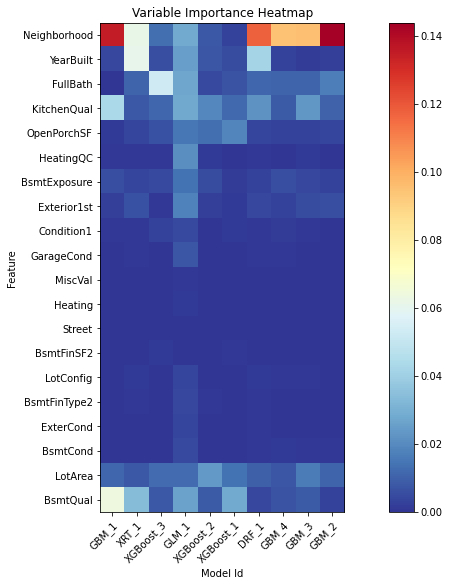

In [ ]:
va_plot = aml.varimp_heatmap()

In [ ]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220712_30030

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 94678465.45627515
RMSE: 9730.285990466835
MAE: 6191.5871373835935
RMSLE: 0.0536109751393486
R^2: 0.984987848542091
Mean Residual Deviance: 94678465.45627515
Null degrees of freedom: 1459
Residual degrees of freedom: 1456
Null deviance: 9207911334609.979
Residual deviance: 138230559566.1617
AIC: 30967.65633375478

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 775401807.6518945
RMSE: 27846.03755746757
MAE: 16005.649965783092
RMSLE: 0.13210630929924172
R^2: 0.877052830111801
Mean Residual Deviance: 775401807.6518945
Null degrees of freedom: 1459
Residual degrees of freedom: 1456
Null deviance: 9211391145025.125
Residual deviance: 1132086639171.7659
AIC: 34037.8827120535

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.586622e+04,7.803959e+02,1.627260e+04,1.564182e+04,1.672405e+04,1.465926e+04,1.603335e+04
1,mean_residual_deviance,7.684941e+08,3.074954e+08,1.197316e+09,5.706493e+08,9.885415e+08,5.932326e+08,4.927310e+08
2,mse,7.684941e+08,3.074954e+08,1.197316e+09,5.706493e+08,9.885415e+08,5.932326e+08,4.927310e+08
3,null_deviance,1.842278e+12,1.649666e+11,1.912960e+12,1.567440e+12,2.008247e+12,1.856402e+12,1.866342e+12
4,r2,8.786373e-01,4.487979e-02,8.140426e-01,8.950488e-01,8.523183e-01,9.073151e-01,9.244615e-01
5,residual_deviance,2.257755e+11,9.459330e+10,3.556029e+11,1.643470e+11,2.965625e+11,1.714442e+11,1.409211e+11
6,rmse,2.729710e+04,5.403966e+03,3.460226e+04,2.388827e+04,3.144108e+04,2.435637e+04,2.219755e+04
7,rmsle,1.311858e-01,1.594405e-02,1.421010e-01,1.382236e-01,1.420787e-01,1.042433e-01,1.292823e-01
